In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
%cd /content/drive/My Drive/data

/content/drive/My Drive/data


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## matplotlib 한글 폰트 깨짐 현상 해결

In [9]:
import matplotlib as mpl

 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


# 데이터 불러오기

In [80]:
data = pd.read_csv("네이비즘서버시간이용자수데이터.csv", encoding = 'euc-kr')
data['시기+날짜'] = data['시기'] + ' (' + data['날짜'] + ')'
data

,날짜,서버시간hits수,종류,시기,설명,학교,시기+날짜
0,2019-02-19,12686,4학년 수강신청,2019년도 1학기,2019년도 1학기 4학년 수강신청,고려대,2019년도 1학기 (2019-02-19)
1,2019-02-20,22754,3학년 수강신청,2019년도 1학기,2019년도 1학기 3학년 수강신청,고려대,2019년도 1학기 (2019-02-20)
2,2019-02-21,32344,2학년 수강신청,2019년도 1학기,2019년도 1학기 2학년 수강신청,고려대,2019년도 1학기 (2019-02-21)
3,2019-02-22,1975,1학년 수강신청,2019년도 1학기,2019년도 1학기 1학년 수강신청,고려대,2019년도 1학기 (2019-02-22)
4,2019-03-06,13125,"3,4 학년 수강신청 정정",2019년도 1학기,"2019년도 1학기 3,4학년 수강신청 정정",고려대,2019년도 1학기 (2019-03-06)
5,2019-03-07,22943,"1,2학년 수강신청 정정",2019년도 1학기,"2019년도 1학기 1,2학년 수강신청 정정",고려대,2019년도 1학기 (2019-03-07)
6,2019-03-08,32429,전체학년 수강신청 정정,2019년도 1학기,2019년도 1학기 전체학년 수강신청 정정,고려대,2019년도 1학기 (2019-03-08)
7,2019-08-16,11659,4학년 수강신청,2019년도 2학기,2019년도 2학기 4학년 수강신청,고려대,2019년도 2학기 (2019-08-16)
8,2019-08-19,24316,3학년 수강신청,2019년도 2학기,2019년도 2학기 3학년 수강신청,고려대,2019년도 2학기 (2019-08-19)
9,2019-08-20,30784,2학년 수강신청,2019년도 2학기,2019년도 2학기 2학년 수강신청,고려대,2019년도 2학기 (2019-08-20)


# 고려대 4학년 수강신청날짜에 네이비즘 서버시간 hits한 횟수를 나타내는 그래프 그리기

In [0]:
data_4학년_고려대 = data[(data.종류 == '4학년 수강신청') & (data.학교 == '고려대')]
data_4학년_고려대.set_index('시기+날짜', inplace = True)``

In [109]:
data_4학년_고려대['서버시간hits수']

시기+날짜
2019년도 1학기 (2019-02-19)    12686
2019년도 2학기 (2019-08-16)    11659
2020년도 1학기 (2020-02-18)    43348
Name: 서버시간hits수, dtype: int64

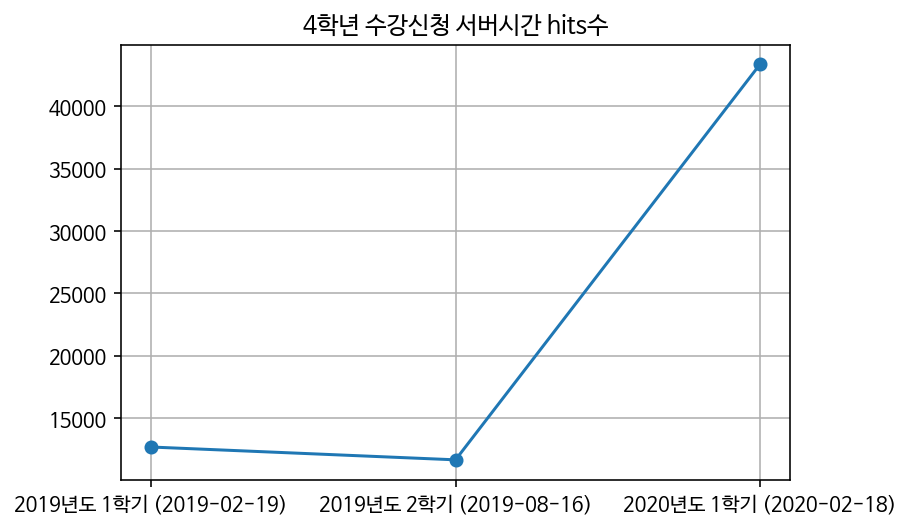

In [140]:
plt.title('4학년 수강신청 서버시간 hits수')
plt.grid(True)
plt.plot(data_4학년_고려대['서버시간hits수'], marker = 'o' )
plt.savefig('4학년_수강신청_서버시간_hits수.jpg')

## 고려대와 연세대 수강신청날짜에 네이비즘 서버시간 hits한 횟수를 비교하는 그래프 그리기

In [132]:
data_group = data.groupby(['학교', '시기'])['서버시간hits수'].sum()
data_group = data_group.reset_index(level= 0)
data_group

,학교,서버시간hits수
시기,,
2019년도 1학기,고려대,138256
2019년도 2학기,고려대,164862
2020년도 1학기,고려대,43348
2019년도 1학기,연세대,28152
2019년도 2학기,연세대,32083
2020년도 1학기,연세대,1094


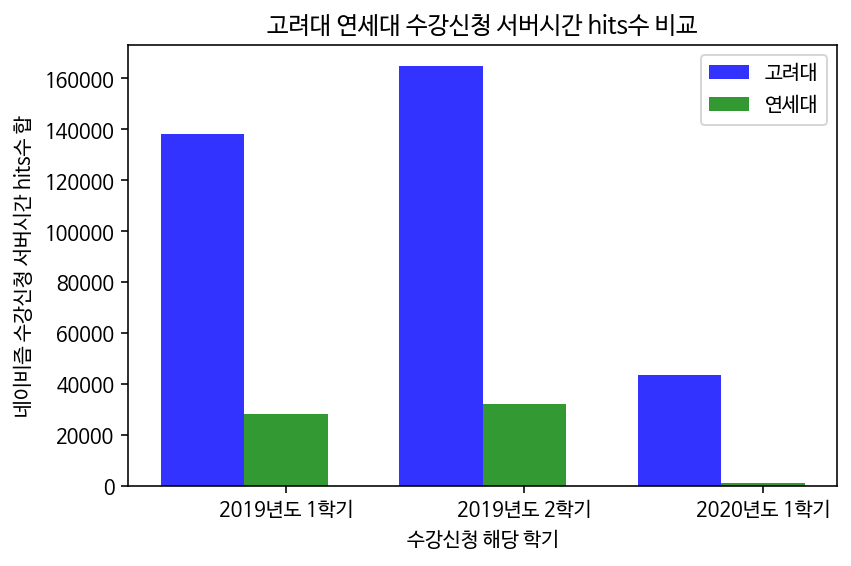

In [133]:
# data to plot
n_periods = 3
고려대_hits수 = data_group[data_group['학교'] == '고려대']['서버시간hits수']
연세대_hits수 = data_group[data_group['학교'] == '연세대']['서버시간hits수']

# create plot
fig, ax = plt.subplots()
index = np.arange(n_periods)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, 고려대_hits수, bar_width,
alpha=opacity,
color='b',
label='고려대')

rects2 = plt.bar(index + bar_width, 연세대_hits수, bar_width,
alpha=opacity,
color='g',
label='연세대')

plt.xlabel('수강신청 해당 학기')
plt.ylabel('네이비즘 수강신청 서버시간 hits수 합')
plt.title('고려대 연세대 수강신청 서버시간 hits수 비교')
plt.xticks(index + bar_width, ('2019년도 1학기', '2019년도 2학기', '2020년도 1학기'))
plt.legend()


plt.tight_layout()
plt.savefig('고려대_연세대_수강신청_서버시간_hits수비교.jpg')
plt.show()